## create table `metadata` and alter it by new one

In [1]:
import os, shutil, sqlite3, glob
db_path = '/data/aoi-wzs-p3-dip-prewave-saiap/metadata.db'
conn = sqlite3.connect(db_path)
c = conn.cursor()

In [2]:
c.execute('select name from sqlite_master where type="table"')
c.fetchall()

[('metadata',), ('new_metadata',)]

In [3]:
c.execute('select distinct date from metadata order by date desc').fetchone()

('20200729',)

In [19]:
x = c.execute('select path, label from metadata where test_label is NULL and label is not NULL').fetchall()
print(len(x))
for p, l in x:
#     print(l,p)
    c.execute(f'update metadata set test_label=? where path=?', (l,p)).fetchone()
    c.execute('commit')
#     break


658879


In [8]:
x = c.execute('''
    select * from old_metadata
''').fetchall()
y = c.execute('''
    select * from metadata
''').fetchall()
print(len(x), len(y))
print(x[0], y[0])

704340 704340
('/data/aoi-wzs-p3-dip-prewave-saiap/Phase1-Cap/P3_SAIAP_0523/DIP/OK/ElecCapacitance/UTC72_270.bmp', 'UTC72_270.bmp', None, None, 'UTC72', 'ElecCap', '-270', None, None, None, None, None, 'bmp', '65', '59', '20190523', 'OK', 'OK', None) ('/data/aoi-wzs-p3-dip-prewave-saiap/Phase1-Cap/P3_SAIAP_0523/DIP/OK/ElecCapacitance/UTC72_270.bmp', 'UTC72_270.bmp', None, None, 'UTC72', 'ElecCap', '-270', None, None, None, None, None, 'bmp', '65', '59', '20190523', 'OK', None, None)


In [4]:
c.execute('alter table metadata rename to old_metadata')

In [5]:
# index cannot be column value
c.execute('''CREATE TABLE metadata
             (path text primary key, 
             filename text not null, 
             SN text, 
             PanelNo text, 
             location text not null, 
             component text not null, 
             degree text, 
             capacity text, 
             img_capacity text, 
             voltage text, 
             index_count text,
             eagle text,
             extension text not null,
             width text,
             height text,
             date text,
             label text,
             test_label text,
             A4_result test)''')

In [7]:
c.execute('select SN, count(*) from metadata').fetchone()

('CN05GD68WS20007S03EPA00_TC9402', 891153)

In [4]:
c.execute("""insert into metadata 
(path, filename, SN, PanelNo, location, component, degree, capacity, img_capacity, voltage, index_count, eagle, extension, width, height, date, label, test_label, A4_result) 
select path, filename, SN, PanelNo, location, component, degree, capacity, img_capacity, voltage, index_count, eagle, extension, width, height, date, label, test_label, A4_result
from new_metadata
""").fetchall()

IntegrityError: UNIQUE constraint failed: metadata.path

In [2]:
c.execute('drop table new_metadata')

In [4]:
# c.execute('commit')
conn.commit()
conn.close()

# insert L, SATA 

In [61]:
import os, glob
# base_path = '/data/aoi-wzs-p3-dip-prewave-saiap/L/Filtered-L-02200531/*/*.png'
base_path = '/data/aoi-wzs-p3-dip-prewave-saiap/SATA/SATA-03010521-color-NG/*/*.png'
img_list = glob.glob(base_path)
img_list = sorted(img_list, key=str.upper)
len(img_list)

129835

In [62]:
img_list[0]



'/data/aoi-wzs-p3-dip-prewave-saiap/SATA/SATA-03010521-color-NG/Black/20200415081120_EAGLE3550DE010001_SATA3_SATA_270_NA_NA_0.png'

In [63]:
import tensorflow as tf
def read_width_height(path):
    img = tf.io.read_file(path)
    img = tf.io.decode_image(img, channels=3, expand_animations = False)
    width = img.shape[1]
    height = img.shape[0]
    return width, height



In [64]:
name_dict = {}
for i in img_list:
    directory, filename = os.path.split(i)
    fn, ext = os.path.splitext(filename)
    ext = ext.split('.')[-1]
    filename_leng = len(filename.split('_'))
    if filename_leng not in list(dict(name_dict).keys()):
        name_dict.update({filename_leng:[]})
    name_dict[filename_leng].append(i)
print(list(dict(name_dict).keys()))
           

[8, 7]


In [65]:
name_dict[8][0]

'/data/aoi-wzs-p3-dip-prewave-saiap/SATA/SATA-03010521-color-NG/Black/20200415081120_EAGLE3550DE010001_SATA3_SATA_270_NA_NA_0.png'

In [66]:
name_dict[7][0]

'/data/aoi-wzs-p3-dip-prewave-saiap/SATA/SATA-03010521-color-NG/Black/20200428130228_HDD3_SATA_270_NA_NA_0.png'

In [70]:
c.execute('select count(*), * from metadata where date="20200301" and component="SATA"').fetchone()


(89602,
 '/data/aoi-wzs-p3-dip-prewave-saiap/SATA/SATA-03010521-color-NG/Black/CN0CN0MPWS20005400F2A00_3550DJ01A001_HDD3_SATA_270_NA_NA_0.png',
 'CN0CN0MPWS20005400F2A00_3550DJ01A001_HDD3_SATA_270_NA_NA_0.png',
 'CN0CN0MPWS20005400F2A00_HDD3',
 'CN0CN0MPWS20005400F2A00',
 'HDD3',
 'SATA',
 '270',
 'NA',
 None,
 'NA',
 '0',
 '3550DJ01A001',
 'png',
 '192',
 '85',
 '20200301',
 'Black',
 None,
 None)

In [8]:
def L_2(ip):
    directory, filename = os.path.split(ip)
    directory = directory.split(os.path.sep)
    fn, ext = os.path.splitext(filename)
    ext = ext.split('.')[-1]
    width, height = read_width_height(ip)
    splitted_fn = fn.split('_')
    symbol = (
                ip, 
                filename, 
                None, 
                None, 
                'unknown',
                'L',
                None,
                None,
                None,
                None,
                None,
                None,
                ext,
                width,
                height,
                '20200220',
                directory[-1],
                None,
                None,
            )
    return symbol

def L_6(comp, date, ip):
    #CN0R6JMPWS20001401CKA00_SATA4_270_NA_NA_0.png
    directory, filename = os.path.split(ip)
    directory = directory.split(os.path.sep)
    fn, ext = os.path.splitext(filename)
    ext = ext.split('.')[-1]
    width, height = read_width_height(ip)
    splitted_fn = fn.split('_')
    PanelNo = splitted_fn[0]
    location = splitted_fn[1]
    degree = splitted_fn[2]
    capacity = splitted_fn[3]
    voltage = splitted_fn[4]
    index_count = splitted_fn[5]
    symbol = (
                ip, 
                filename, 
                f'{PanelNo}_{location}', 
                PanelNo, 
                location,
                comp,
                degree,
                capacity,
                None,
                voltage,
                index_count,
                None,
                ext,
                width,
                height,
                date,
                directory[-1],
                None,
                None,
            )
    return symbol

def L_7(comp, date, ip):
    #CN0YD74FWS20001A00ZCA00_SATA1_SATA_270_NA_NA_0.png
    directory, filename = os.path.split(ip)
    directory = directory.split(os.path.sep)
    fn, ext = os.path.splitext(filename)
    ext = ext.split('.')[-1]
    width, height = read_width_height(ip)
    splitted_fn = fn.split('_')
    PanelNo = splitted_fn[0]
    location = splitted_fn[1]
    degree = splitted_fn[3]
    capacity = splitted_fn[4]
    voltage = splitted_fn[5]
    index_count = splitted_fn[6]
    symbol = (
                ip, 
                filename, 
                f'{PanelNo}_{location}', 
                PanelNo, 
                location,
                comp,
                degree,
                capacity,
                None,
                voltage,
                index_count,
                None,
                ext,
                width,
                height,
                date,
                directory[-1],
                None,
                None,
            )
    return symbol

def L_8(comp, date, ip):
    #version: CN0HMX8DWS20006A03RDA01_3550AH01B002_PT4_AluCap_0_270_NA_0
    directory, filename = os.path.split(ip)
    directory = directory.split(os.path.sep)
    fn, ext = os.path.splitext(filename)
    ext = ext.split('.')[-1]
    width, height = read_width_height(ip)
    splitted_fn = fn.split('_')
    PanelNo = splitted_fn[0]
    location = splitted_fn[2]
    eagle = splitted_fn[1]
    degree = splitted_fn[4]
    capacity = splitted_fn[5]
    voltage = splitted_fn[6]
    index_count = splitted_fn[7]
    symbol = (
                ip, 
                filename, 
                f'{PanelNo}_{location}', 
                PanelNo, 
                location,
                comp,
                degree,
                capacity,
                None,
                voltage,
                index_count,
                eagle,
                ext,
                width,
                height,
                date,
                directory[-1],
                None,
                None,
            )
    return symbol

possible_comps = ['AluCap', 'ElecCap', 'acpi', 'Ins', 'SATA', 'L', 'BH', 'Jumper', 'PCI', 'Aud', 'Stud', 'NI', 'DimSoc', 'CONN', 'USB', 'VGA']
def L_11(ip):
    # d: IMAGE_FOLDER_PATH/line/date/A4_result
    # f: PanelNo_eagle_location_component_degree_capacity_voltage_index.extension
    # new version: CN0HMX8DWS20006A03RDA01_355_0AH01_B002_PT4_AluCap_0_270_NA_0
    directory, filename = os.path.split(ip)
    directory = directory.split(os.path.sep)
    fn, ext = os.path.splitext(filename)
    ext = ext.split('.')[-1]
    width, height = read_width_height(ip)
    if len(directory[-2]) != 4:
        directory[-2] = '0' + directory[-2]
    for c in possible_comps:
        if c in fn.split('_'):
            possible_bool = True
            splited_filename = fn.split(f'_{c}_')
            back_filename = splited_filename[-1] # 0_270_NA_0
            front_filename = splited_filename[0] # CN0HMX8DWS20006A03RDA01_355_0AH01_B002_PT4
            PanelNo = front_filename.split('_')[0]
            front_filename = front_filename.replace(f'{PanelNo}_', '') # 355_0AH01_B002_PT4
            location = front_filename.split('_')[-1]
            front_filename = front_filename.replace(f'_{location}', '') # 355_0AH01_B002
            eagle = front_filename.replace('_', '')
            degree = back_filename.split('_')[0]
            capacity = back_filename.split('_')[1]
            voltage = back_filename.split('_')[2]
            index_count = back_filename.split('_')[3]
            symbol = (
                        ip, 
                        filename, 
                        f'{PanelNo}_{location}', 
                        PanelNo, 
                        location,
                        c,
                        degree,
                        capacity,
                        None,
                        voltage,
                        index_count,
                        eagle,
                        ext,
                        width,
                        height,
                        f'2020{directory[-2]}',
                        None,
                        None,
                        directory[-1]
                    )
            return symbol

In [71]:
c.execute('commit')


In [69]:
for k in list(dict(name_dict).keys()):
    for p in name_dict[k]:
        if k==7:
            symbol=L_7('SATA', '20200301', p)
        elif k==8:
            symbol=L_8('SATA', '20200301', p)
        elif k==6:
            symbol=L_6('SATA', '20200301', p)
        elif k==2:
            symbol=L_2(p)
        try:
            c.execute('''INSERT INTO metadata VALUES 
                        (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
                        ''', symbol).fetchone()
        except Exception as e:
            continue
#             print(f'Exception msg: {e}')
            


InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'Unable to decode bytes as JPEG, PNG, GIF, or BMP'

## add column wh

In [110]:
def update_wh(ori_tuple):
    width_index = 12
    height_index = 13
    assert ori_tuple[width_index] == None, f'{ori_tuple[width_index]}'
    assert ori_tuple[height_index] == None, f'{ori_tuple[height_index]}'
    path = ori_tuple[0]
    sql_update_query = ''
    try:
        im = Image.open(path)
        width, height = im.size
        if str(width) != '' and str(height) != '':
            sql_update_query = f"update metadata set width = '{width}', height='{height}' where path = '{path}'"
    except:
        print(path)
    return sql_update_query

In [121]:
update_count = 0
for sql in map(update_wh, toadd_wh):
#     print(sql)
    if sql != '':
        try:
            c.execute(sql)
            conn.commit()
            update_count+=1
        #     c.close()
        except sqlite3.Error as error:
            print('Failed to update sqlite table', error)
            print(update_count)
            break
        except Exception as e:
            print(f'Exception msg: {e}')
            print(update_count)
            break

/data/aoi-wzs-p3-dip-prewave-saiap/Phase2-Cap/0906/AluCapacitor/Model-2/OK/270/CN0FPP7FWS200996013UA00_PT4601_90_NA_NA.png


## to labeled folders

In [39]:
cp_dest = '/p3/unlabeled_pci_location/'
if not os.path.exists(cp_dest):
    os.makedirs(cp_dest)
for filtered in filtered_list:
    try:
        if filtered[5]=='SATA' or filtered[5]=='PCI':
            dest_class_path = f'{cp_dest}{filtered[4]}/'
        if not os.path.exists(dest_class_path):
            os.makedirs(dest_class_path)
        shutil.copyfile(filtered[0], f'{dest_class_path}{filtered[1]}')
    except Exception as e:
        print(f'{e}')

## add column `test_label` which represents `corrected labels` or `new labeled label`

In [4]:
y = c.execute('select * from metadata').fetchall()
x = c.execute('select * from old_metadata').fetchall()
print(len(x), len(y))

704340 704340


In [21]:
# for check the same path but diff label
diff_label_path = c.execute('''
    SELECT * FROM old_metadata JOIN metadata 
    ON old_metadata.path = metadata.path
    WHERE old_metadata.label <> metadata.label
''').fetchall()
len(diff_label_path)

0

In [54]:
for dlp in diff_label_path:
    symbol = (dlp[1], dlp[0], )
    sql = 'update metadata set test_label=? where path = ?'
    try:
        c.execute(sql, symbol).fetchone()
    #     c.close()
    except sqlite3.Error as error:
        print('Failed to update sqlite table', error)
        print(update_count)
        break
    except Exception as e:
        print(f'Exception msg: {e}')
        print(update_count)
        break

# insert label from `own labeled` directories of `AIimg2020` to `test_label`

In [4]:
x = c.execute('select * from metadata where label is not NULL and test_label is NULL').fetchall()
len(x)

584716

In [15]:
# from shutil import copyfile, move
# ai_alu = glob.glob('/p3/unlabeled_alu_m1/*/*')
# ai_elec = glob.glob('/p3/unlabeled_elec_m1/*/*')
# ai_all = ai_alu+ai_elec
# print(len(ai_alu), len(ai_elec), len(ai_all))
rita_alucap = glob.glob('/p3/golden-ds/rita/alucap-m1-folder/*/*')
rita_eleccap = glob.glob('/p3/golden-ds/rita/eleccap-m1-folder/*/*')
rita_cap = rita_alucap+rita_eleccap
print(len(rita_alucap), len(rita_eleccap), len(rita_cap))

18224 4831 23055


In [16]:
not_add_yet = []
for ai in rita_cap:
    folder, fn = os.path.split(ai)
    if fn.split('-')[0] != 'A':
        not_add_yet.append(ai)
len(not_add_yet)

23055

In [17]:
# updated = []
for a in not_add_yet:
    folder, fn = os.path.split(a)
    new_label = folder.split(os.path.sep)[-1]
    fn = fn.split('-')[-1]
#     try:
#         pl = c.execute('select path, label from metadata where filename= ?', (fn,)).fetchall()
#     except Exception as e:
#         print(e)
#     for x in pl:
#         if x[1]!=new_label:
    symbol = (new_label, fn, )
    try:
        c.execute('update metadata set test_label = ? where filename= ?', symbol).fetchall()
        c.execute('commit')
#         updated.append(x[0])
#                 move(a, f'{folder}/A-{fn}')
    except Exception as e:
            print(e)
# print(len(updated))

# update img_capacity to metadata

6263


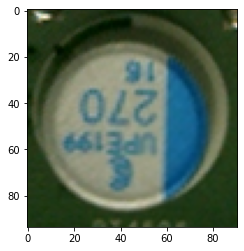

In [185]:
test = c.execute('''
    select * from metadata 
    where img_capacity is NULL
    and component is "AluCap"
    and capacity is "NA"
    and extension is "png"
    and label is "OK"
''').fetchall()
print(len(test))
plt.imshow(parse_to_show(test[-2][0]))

In [23]:
from shutil import copyfile, move
# aluocv = glob.glob('/p3/alu-img/AluCap-ocv-class-2/Classified_01060113/*/*')
# aluocv = glob.glob('/p3/alu-img/AluCap-ocv-class-2/Classified_OCV_10101120/*/*') 
# aluocv = glob.glob('/p3/alu-img/AluCap-ocv-class-2/Classified_OCV-11201223/*/*')
# aluocv = glob.glob('/p3/alu-img/AluCap-ocv-class-2/Classified_OCV_09051010/*/*') 
# aluocv = glob.glob('/p3/alu-img/AluCap-ocv-class-2/OCV-08230904/*/*')
# aluocv = glob.glob('/p3/alu-img/AluCap-ocv-class-2/unlabeled_alu_ocv_2class/*/*')
len(aluocv)

145977

In [24]:
ao = []
for a in aluocv:
    folder, fn = os.path.split(a)
    if fn.split('-')[0] != 'A':
        ao.append(a)
len(ao)

0

In [30]:
x = c.execute('''
    select * from metadata 
    where img_capacity is not NULL 
    and capacity is not "NA"
    and img_capacity <> capacity
    and component is "AluCap" 
    and (label is "OK" or label is NULL) 
    order by date asc
''').fetchall()
len(x)

0

In [20]:
match = 0
match2 = []
match3 = []
matchother = []
for a in ao:
    folder, fn = os.path.split(a)
    img_capacity = folder.split(os.path.sep)[-1]
    fn = fn.split('-')[-1]
#     symbol = (fn, )
#     select = c.execute('select path from metadata where filename = ?', symbol).fetchall()
    symbol = (img_capacity, fn, )
    try:
        c.execute('update metadata set img_capacity = ? where filename= ?', symbol).fetchall()
        conn.commit()
        match+=1
        move(a, f'{folder}/A-{fn}')
    except Exception as e:
        print(e)
#     if len(select)==2:
#         match2.append([select[0], select[1]])
#     elif len(select)==3:
#         match3.append([select[0], select[1], select[2]])
#     else:
#         matchother.append(select)
print(match)

47813


# Check NG images in metadata

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
def parse_to_show(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, 3)
    return img

In [34]:
c.execute('select distinct label from metadata where component is "AluCap"').fetchall() # MoreComp, UpsideDown, InversePolarity Done

[('OK',),
 ('NG-InversePolarity',),
 ('NG-NoneComp',),
 ('NG-OutsidePosition',),
 ('NG-UpsideDown',),
 ('NG-MoreComp',),
 ('OK-InvalidPNG',),
 (None,)]

In [33]:
c.execute('select distinct label from metadata where component is "ElecCap"').fetchall() # NoneComp yet

[('OK',),
 ('NG-InversePolarity',),
 ('NG-NoneComp',),
 ('NG-OutsidePosition',),
 ('NG-UpsideDown',),
 ('NG-MoreComp',),
 (None,)]

In [165]:
x = c.execute('''
    select * from metadata 
    where component is 'AluCap'
    and label is 'NG-NoneComp'
''').fetchall()
len(x)

12611

('OK', '/data/aoi-wzs-p3-dip-prewave-saiap/Phase1-Cap/DIP_Data2/AluCapacitance/OK/Angle180-NG/PTC2_180 (18).bmp')
('OK', '/data/aoi-wzs-p3-dip-prewave-saiap/Phase1-Cap/DIP_Data2/AluCapacitance/OK/Angle180-NG/PTC2_180 (17).bmp')


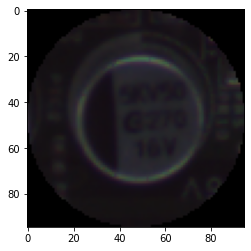

In [157]:
# wrong_index = [73, 77]
# wrong_index = [w+(240*4) for w in wrong_index]
# for wi in wrong_index:
#     pre_symbol = ('OK', x[wi][0])
#     print(pre_symbol)
#     plt.imshow(parse_to_show(x[wi][0]))
#     c.execute('update metadata set test_label = ? where path = ?', pre_symbol).fetchall()
#     c.execute('update metadata set label = ? where path = ?', pre_symbol).fetchall()
# conn.commit()

In [ ]:
# maxleng = len(x)
# minleng = 48*44
# exp = int((maxleng - minleng) / 8)
fig, axes = plt.subplots(nrows=8*5, ncols=6, figsize=(24, 32*5), 
                       subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.05)
for idx, (ax, value_list) in enumerate(zip(axes.flat, x[240*10:])):
    ax.imshow(parse_to_show(value_list[0]))
    ax.set_title(f'idx:{idx}\ndegree:{value_list[6]}\nlabel:{value_list[-2]}')
plt.show()

## check degree and component

In [184]:
x = c.execute('select * from metadata where component="ElecCap" and degree="180" and extension="png" and label is not NULL').fetchall()
len(x)

0

In [179]:
# c.execute('commit')
# conn.commit()
# c.execute('rollback')

In [177]:
for i in range(len(x)):
    ind = i
#     print(x[ind])
#     plt.imshow(parse_to_show(x[ind][0]))
    symbol=('270', x[ind][0])
    c.execute('update metadata set degree=? where path=?',symbol).fetchone()
#     symbol=('OK', x[ind][0])
#     c.execute('update metadata set test_label=? where path=?',symbol).fetchone()

# convert "" to NULL in every column

In [225]:
c.execute('update metadata set label = NULL where label = ""')
c.fetchall()
conn.commit()

# Change label of Invalid PNG
### with error `InvalidArgumentError: Invalid PNG data, size 6500`
for validating: tf.gfile.GFile(image_path, 'rb').read()

In [23]:
ds = tf.data.experimental.SqlDataset(
    'sqlite', db_path,
    '''
        select path, degree from metadata
        where (label = 'OK' or label = 'NG-InversePolarity')
        and (component = 'AluCap' or component = 'ElecCap')
        and (degree = '0' or degree = '270')
        and width is not NULL
        ''', 
    (tf.string, tf.string)
)

In [12]:
def process_feature(path, degree):
    byte_string_img = tf.io.read_file(path)
    img = tf.io.decode_image(byte_string_img, channels=target_shape[-1], dtype=tf.dtypes.float32)
    return img, degree

In [13]:
for p, d in ds.take(ds_num):
    try:
        process_feature(p, d)
    except Exception as e:
        print(f'{e}')
        print(f'{p}')

Invalid PNG data, size 6500 [Op:DecodePng]
b'/data/aoi-wzs-p3-dip-prewave-saiap/Phase2-Cap/0906/AluCapacitor/Model-2/OK/270/CN00010CWS20099401AIA00_PT4604_90_NA_NA.png'


InvalidArgumentError: Invalid PNG data, size 6500

In [20]:
c.execute('''
        update labeled set label = 'OK-InvalidPNG'
        where path = '/data/aoi-wzs-p3-dip-prewave-saiap/Phase2-Cap/0906/AluCapacitor/Model-2/OK/270/CN00010CWS20099401AIA00_PT4604_90_NA_NA.png'
        ''')
c.fetchall()
conn.commit()

In [193]:
c.close()
conn.close()